# Composition of compendia

This notebook makes figures that illustrate the composition of the compendia. In particular this notebook takes metadata files (generated by Sam Neff from Dartmouth) and creates plots to show the different types of media used in experiments and what types of genetic malnipulations were used as well.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import plotnine as pn
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import paths

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Import metadata files
pao1_metadata_filename = "PAO1TableVF1.csv"
pa14_metadata_filename = "PA14TableVF1.csv"

In [3]:
# Import mapping files provided by Georgia to standardize values
media_mapping_filename = paths.MEDIA_MAP
pathway_mapping_filename = paths.PATHWAY_MAP
gene_funt_mapping_filename = paths.GENE_FUNT_MAP

In [4]:
pao1_metadata = pd.read_csv(pao1_metadata_filename, header=0, index_col=0)
pa14_metadata = pd.read_csv(pa14_metadata_filename, header=0, index_col=0)

In [5]:
print(pao1_metadata.shape)
pao1_metadata.head(10)

(287, 8)


,Sample.ID,Medium,Perturbed.Gene,Gene.Function,KEGG.Pathway,Strain,StudyInGeo,GSEID
SRA.Study.ID,,,,,,,,
PRJEB14322,ERX1517774,Medium B,PA1421,(RefSeq) guanidinobutyrase,Arginine and proline metabolism,PAO1,N,NaN
PRJEB14322,ERX1517774,Medium B,PA1421,(RefSeq) guanidinobutyrase,Metabolic pathways,PAO1,N,NaN
PRJEB14322,ERX1517773,Medium B,None,NaN,NaN,PAO1,N,NaN
PRJEB18543,"ERX1819490, ERX1819489, ERX1819488, ERX1819487...",NaN,PA2492,(RefSeq) transcriptional regulator MexT,NaN,PAO1,N,NaN
PRJEB18543,"ERX1819481, ERX1819480, ERX1819479",NaN,None,NaN,NaN,PAO1,N,NaN
PRJEB21307,"ERX2068558, ERX2068557, ERX2068556",LB,PA2020,(RefSeq) transcriptional regulator,beta-Lactam resistance,PAO1,N,NaN
PRJEB21307,"ERX2068561, ERX2068560, ERX2068559",LB,None,NaN,NaN,PAO1,N,NaN
PRJEB36276,"ERX3834797, ERX3834796, ERX3834795, ERX3834794...",M9 Minimal Media,PA4266,(RefSeq) elongation factor G,NaN,PAO1,N,NaN
PRJEB36276,"ERX3834791, ERX3834790, ERX3834789",M9 Minimal Media,None,NaN,NaN,PAO1,N,NaN


In [6]:
print(pa14_metadata.shape)
pa14_metadata.head(10)

(127, 8)


,Sample.ID,Medium,Perturbed.Gene,Gene.Function,KEGG.Pathway,Strain,StudyInGeo,GSEID
SRA.Study.ID,,,,,,,,
PRJNA238222,"SRX470350, SRX470351, SRX470352, SRX470353, SR...",Other,PA0376,(RefSeq) RNA polymerase sigma factor RpoH,NaN,PA14,Y,GSE54999
PRJNA238222,"SRX470313, SRX470314, SRX470315, SRX470316, SR...",Other,PA0762,(RefSeq) RNA polymerase sigma factor AlgU,NaN,PA14,Y,GSE54999
PRJNA238222,"SRX470330, SRX470331, SRX470332, SRX470333, SR...",Other,PA1455,(RefSeq) flagellar biosynthesis sigma factor FliA,Two-component system,PA14,Y,GSE54999
PRJNA238222,"SRX470330, SRX470331, SRX470332, SRX470333, SR...",Other,PA1455,(RefSeq) flagellar biosynthesis sigma factor FliA,Biofilm formation - Pseudomonas aeruginosa,PA14,Y,GSE54999
PRJNA238222,"SRX470330, SRX470331, SRX470332, SRX470333, SR...",Other,PA1455,(RefSeq) flagellar biosynthesis sigma factor FliA,Flagellar assembly,PA14,Y,GSE54999
PRJNA238222,"SRX470372, SRX470373, SRX470374, SRX470375, SR...",Other,PA1776,(RefSeq) RNA polymerase sigma factor SigX,NaN,PA14,Y,GSE54999
PRJNA238222,"SRX470372, SRX470373, SRX470374, SRX470375, SR...",Other,PA1776,(RefSeq) RNA polymerase sigma factor SigX,NaN,PA14,Y,GSE54999
PRJNA238222,"SRX470344, SRX470345, SRX470346, SRX470347, SR...",Other,PA2426,(RefSeq) extracytoplasmic-function sigma-70 fa...,NaN,PA14,Y,GSE54999
PRJNA238222,"SRX470365, SRX470366, SRX470367, SRX470368, SR...",Other,PA3662,(RefSeq) hypothetical protein,NaN,PA14,Y,GSE54999


## Clean up values

In [7]:
# Format dataframe
# Only keep first row
pao1_metadata_first = pao1_metadata[~pao1_metadata.index.duplicated(keep="first")]
pa14_metadata_first = pa14_metadata[~pa14_metadata.index.duplicated(keep="first")]

In [8]:
# Concatenate
both_metadata_first = pd.concat([pao1_metadata_first, pa14_metadata_first])

In [9]:
# Read in mappers
media_map = pd.read_csv(media_mapping_filename, sep="\t", header=0, index_col=0)
pathway_map = pd.read_csv(pathway_mapping_filename, sep="\t", header=0, index_col=0)
gene_funt_map = pd.read_csv(gene_funt_mapping_filename, sep="\t", header=0, index_col=0)

In [10]:
media_dict = media_map["Medium.Grouped"].to_dict()

In [11]:
pathway_dict = pathway_map["KEGG.Pathway.Grouped"].to_dict()

In [12]:
gene_funt_dict = gene_funt_map["Gene.Function.Group"].to_dict()

In [13]:
# Rename to clean up legend
both_metadata_tmp = both_metadata_first.replace({"Medium": media_dict})
both_metadata_final = both_metadata_tmp.replace({"Gene.Function": gene_funt_dict})

In [14]:
both_metadata_final.head()

,Sample.ID,Medium,Perturbed.Gene,Gene.Function,KEGG.Pathway,Strain,StudyInGeo,GSEID
SRA.Study.ID,,,,,,,,
PRJEB14322,ERX1517774,King's B,PA1421,guanidinobutyrase,Arginine and proline metabolism,PAO1,N,NaN
PRJEB18543,"ERX1819490, ERX1819489, ERX1819488, ERX1819487...",NaN,PA2492,transcriptional regulator,NaN,PAO1,N,NaN
PRJEB21307,"ERX2068558, ERX2068557, ERX2068556",LB,PA2020,transcriptional regulator,beta-Lactam resistance,PAO1,N,NaN
PRJEB36276,"ERX3834797, ERX3834796, ERX3834795, ERX3834794...",Minimal Media,PA4266,elongation factor G,NaN,PAO1,N,NaN
PRJNA190894,"SRX245814, SRX245815, SRX245816",Other,PA1798,two-component sensor,beta-Lactam resistance,PAO1,Y,GSE44681


## Plot media distribution in PAO1 and PA14

Media will be at the study level

In [15]:
# The legend was very large using the Medium annotations above, instead
# Deb provided some annotations
metadata_media_revised_filename = "Medium annotations.csv"
metadata_media_revised = pd.read_csv(
    metadata_media_revised_filename, index_col=0, header=0
)

In [16]:
print(metadata_media_revised.shape)
metadata_media_revised.head()

(398, 8)


,SRA_ID,Strain,Genotype,Abx_Marker,Variant_Phenotype,Medium,Unnamed: 7,Unnamed: 8
BioProject_ID,,,,,,,,
https://www.ncbi.nlm.nih.gov/bioproject/?term=PRJNA576508,NaN,PA14,NaN,NaN,NaN,Host,Mouse Wound Model,Host
https://www.ncbi.nlm.nih.gov/bioproject/?term=PRJNA576508,NaN,PAO1,NaN,NaN,NaN,Host,Airway Epithelial Cells,Host
https://www.ncbi.nlm.nih.gov/bioproject/?term=PRJNA667949,NaN,PAO1,NaN,NaN,NaN,Other,12,12 samples in CAM medium (LB was only for WGS)
https://www.ncbi.nlm.nih.gov/bioproject/?term=PRJNA613827,NaN,PAO1,NaN,NaN,NaN,LB,3,3 in LB 3 in blood
https://www.ncbi.nlm.nih.gov/bioproject/?term=PRJNA613827,NaN,PAO1,NaN,NaN,NaN,Blood,NaN,3 in LB 3 in blood


### Format study IDs

In [17]:
# Remove trailing "/"
medium_index_processed_tmp = metadata_media_revised.index.str.rstrip("/")
metadata_media_revised.index = medium_index_processed_tmp

# Split on "=" to get some study ids
medium_index_processed_tmp = metadata_media_revised.index.str.split("=").str[-1]
metadata_media_revised.index = medium_index_processed_tmp

# Split on "/" to get some study ids
medium_index_processed = metadata_media_revised.index.str.split("/").str[-1]
metadata_media_revised.index = medium_index_processed

In [18]:
metadata_media_revised.head(10)

,SRA_ID,Strain,Genotype,Abx_Marker,Variant_Phenotype,Medium,Unnamed: 7,Unnamed: 8
BioProject_ID,,,,,,,,
PRJNA576508,NaN,PA14,NaN,NaN,NaN,Host,Mouse Wound Model,Host
PRJNA576508,NaN,PAO1,NaN,NaN,NaN,Host,Airway Epithelial Cells,Host
PRJNA667949,NaN,PAO1,NaN,NaN,NaN,Other,12,12 samples in CAM medium (LB was only for WGS)
PRJNA613827,NaN,PAO1,NaN,NaN,NaN,LB,3,3 in LB 3 in blood
PRJNA613827,NaN,PAO1,NaN,NaN,NaN,Blood,NaN,3 in LB 3 in blood
PRJNA231042,NaN,PAO1,NaN,NaN,NaN,MOPS succinate,NaN,4 host 2 MOPS succinate; LB only for Tn-Seq…no...
PRJNA231042,NaN,PAO1,NaN,NaN,NaN,Host,NaN,4 host 2 MOPS succinate; LB only for Tn-Seq…no...
PRJNA489391,NaN,PA14,NaN,NaN,NaN,LB,4,4 in LB; 4 in host (urine from human and mouse...
PRJNA489391,NaN,PA14,NaN,NaN,NaN,Mouse bladder,NaN,4 in LB; 4 in host (urine from human and mouse...


In [19]:
# Select only rows with PAO1 and PA14 strains
metadata_media_revised = metadata_media_revised[
    (metadata_media_revised["Strain"] == "PAO1")
    | (metadata_media_revised["Strain"] == "PA14")
]
print(metadata_media_revised.shape)
metadata_media_revised.head(10)

(235, 8)


,SRA_ID,Strain,Genotype,Abx_Marker,Variant_Phenotype,Medium,Unnamed: 7,Unnamed: 8
BioProject_ID,,,,,,,,
PRJNA576508,NaN,PA14,NaN,NaN,NaN,Host,Mouse Wound Model,Host
PRJNA576508,NaN,PAO1,NaN,NaN,NaN,Host,Airway Epithelial Cells,Host
PRJNA667949,NaN,PAO1,NaN,NaN,NaN,Other,12,12 samples in CAM medium (LB was only for WGS)
PRJNA613827,NaN,PAO1,NaN,NaN,NaN,LB,3,3 in LB 3 in blood
PRJNA613827,NaN,PAO1,NaN,NaN,NaN,Blood,NaN,3 in LB 3 in blood
PRJNA231042,NaN,PAO1,NaN,NaN,NaN,MOPS succinate,NaN,4 host 2 MOPS succinate; LB only for Tn-Seq…no...
PRJNA231042,NaN,PAO1,NaN,NaN,NaN,Host,NaN,4 host 2 MOPS succinate; LB only for Tn-Seq…no...
PRJNA489391,NaN,PA14,NaN,NaN,NaN,LB,4,4 in LB; 4 in host (urine from human and mouse...
PRJNA489391,NaN,PA14,NaN,NaN,NaN,Mouse bladder,NaN,4 in LB; 4 in host (urine from human and mouse...


In [20]:
# Select only Medium column
metadata_media_revised = metadata_media_revised["Medium"].to_frame()
print(metadata_media_revised.shape)
metadata_media_revised.head(10)

(235, 1)


,Medium
BioProject_ID,
PRJNA576508,Host
PRJNA576508,Host
PRJNA667949,Other
PRJNA613827,LB
PRJNA613827,Blood
PRJNA231042,MOPS succinate
PRJNA231042,Host
PRJNA489391,LB
PRJNA489391,Mouse bladder


In [21]:
print(both_metadata_final.shape)
both_metadata_final.index.intersection(metadata_media_revised.index).shape

(180, 8)


(208,)

In [22]:
# Map revised annotations to provided annotations to make sure we're only including those studies
# in our PAO1 sample and PA14 sample compendia
print(both_metadata_final.shape)
both_metadata_final = both_metadata_final.merge(
    metadata_media_revised,
    left_index=True,
    right_index=True,
    how="left",
    suffixes=["", "_revised"],
)

(180, 8)


In [23]:
print(both_metadata_final.shape)
both_metadata_final.head(10)

(212, 9)


,Sample.ID,Medium,Perturbed.Gene,Gene.Function,KEGG.Pathway,Strain,StudyInGeo,GSEID,Medium_revised
PRJEB13937,"ERX1477379, ERX1477380, ERX1477381",TSB,None,NaN,NaN,PA14,N,NaN,TSB
PRJEB14322,ERX1517774,King's B,PA1421,guanidinobutyrase,Arginine and proline metabolism,PAO1,N,NaN,Minimal/Defined Media
PRJEB18543,"ERX1819490, ERX1819489, ERX1819488, ERX1819487...",NaN,PA2492,transcriptional regulator,NaN,PAO1,N,NaN,NaN
PRJEB21307,"ERX2068558, ERX2068557, ERX2068556",LB,PA2020,transcriptional regulator,beta-Lactam resistance,PAO1,N,NaN,LB
PRJEB22802,"ERX2195929, ERX2195930, ERX2195931, ERX2195932...",NaN,None,NaN,NaN,PAO1,N,NaN,NaN
PRJEB24427,"ERX2300159, ERX2300160, ERX2300161, ERX2300162...",NaN,None,NaN,NaN,PAO1,N,NaN,NaN
PRJEB25674,"ERX2456848, ERX2456849, ERX2456850, ERX2456851...",NaN,None,NaN,NaN,PAO1,N,NaN,NaN
PRJEB34518,"ERX3552268, ERX3552267, ERX3552266, ERX3552265...",Minimal Media,None,NaN,NaN,PAO1,N,NaN,Minimal/Defined Media
PRJEB34578,"ERX3558798, ERX3558799, ERX3558800, ERX3558801...",Minimal Media,None,NaN,NaN,PAO1,N,NaN,Minimal/Defined Media
PRJEB34916,"ERX3593017, ERX3593018, ERX3593019, ERX3593020...",Minimal Media,None,NaN,NaN,PAO1,N,NaN,Minimal/Defined Media


In [24]:
# Drop duplicate rows
both_metadata_final = both_metadata_final.drop_duplicates()
print(both_metadata_final.shape)

(186, 9)


In [25]:
both_metadata_first_media = (
    both_metadata_final.groupby(["Strain", "Medium_revised"])
    .size()
    .reset_index()
    .pivot(columns="Medium_revised", index="Strain", values=0)
)

In [26]:
both_metadata_first_media

Medium_revised,BM2,Blood,Host,LB,MOPS succinate,Minimal/Defined Media,Mouse Lung Tissue,Mouse bladder,Mueller-Hinton,Other,PIA,Pseudomonas Isolation Agar,SCFM,TSB
Strain,,,,,,,,,,,,,,
PA14,4.0,2.0,NaN,18.0,NaN,NaN,NaN,1.0,2.0,14.0,1.0,NaN,2.0,2.0
PAO1,NaN,1.0,1.0,51.0,1.0,11.0,1.0,NaN,NaN,23.0,NaN,1.0,1.0,4.0


In [27]:
both_metadata_first_media.sum(axis=1)

Strain
PA14    46.0
PAO1    95.0
dtype: float64

In [28]:
# Output media legends for Georgia to review
# both_metadata_first_media.T.to_csv("media_legend.tsv", sep="\t")

In [29]:
# Custom palette
my_cmap = [
    "#2bad8f",
    "#a5d1ab",
    "#f2e380",
    "#eb9f6a",
    "#4363d8",
    "#7d438f",
    "#e8c5e6",
    "#79c2d1",
    "#a8cc3b",
    "#f5b0b0",
    "#d0aee6",
    "#fffac8",
    "#ffd8b1",
    "#000075",
    "#9e9898",
    "#a32450",
    "#b9daed",
]

[Text(0, 0, 'PA14 compendium'), Text(0, 0, 'PAO1 compendium')]

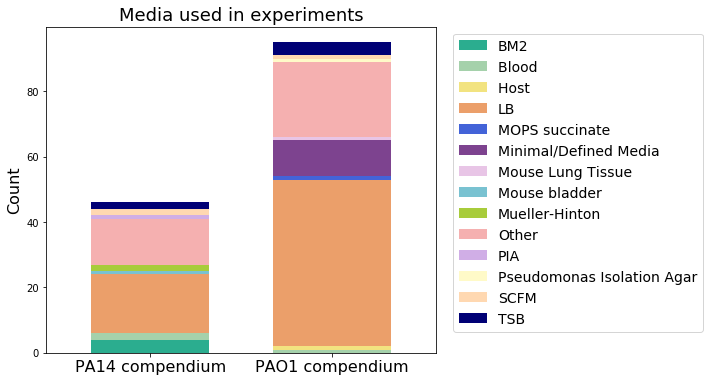

In [30]:
fig_media = both_metadata_first_media.plot(
    kind="bar", stacked=True, color=my_cmap, figsize=(7, 6), width=0.65
)
# fig_media.set_color_cycle([cm(1.*i/num_colors) for i in range(num_colors)])
plt.legend(bbox_to_anchor=(1.7, 1), loc="upper right", ncol=1, fontsize=14)
plt.title("Media used in experiments", fontsize=18)
# x_pos = [0,0.7]
# fig_media.set_xticks(x_pos, ["PA14 compendium", "PAO1 compendium"])
fig_media.set_xlabel("")
fig_media.set_ylabel("Count", fontsize=16)
fig_media.set_xticklabels(
    ["PA14 compendium", "PAO1 compendium"], rotation=0, fontsize=16
)

## Plot Gene function distribution in PAO1 and PA14
Gene function will be at the study level as well since the gene will be the same

In [31]:
# Format
both_metadata_first_function = (
    both_metadata_final.groupby(["Strain", "Gene.Function"])
    .size()
    .reset_index()
    .pivot(columns="Gene.Function", index="Strain", values=0)
)

In [32]:
both_metadata_first_function

Gene.Function,chemotaxis-specific methylesterase,hypothetical protein,2-ketogluconate transporter,ABC transporter ATP-binding protein,ATP-dependent RNA helicase,ClpA/B-type protease,GTP pyrophosphokinase,RNA polymerase sigma factor,RNA pyrophosphohydrolase,RNA-binding protein Hfq,...,elastase,elongation factor G,flagellar hook-associated protein,guanidinobutyrase,heparinase,molecular chaperone,regulatory RNA,resistance-nodulation-cell division (RND) efflux membrane fusion protein,transcriptional regulator,two-component sensor
Strain,,,,,,,,,,,,,,,,,,,,,
PA14,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,6.0,2.0
PAO1,1.0,3.0,1.0,1.0,1.0,1.0,4.0,7.0,1.0,3.0,...,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,14.0,1.0


In [33]:
# Output function metadata for Georgia to review
# both_metadata_first_function.T.to_csv("gene_function_legend.tsv", sep="\t")

[Text(0, 0, 'PA14 compendium'), Text(0, 0, 'PAO1 compendium')]

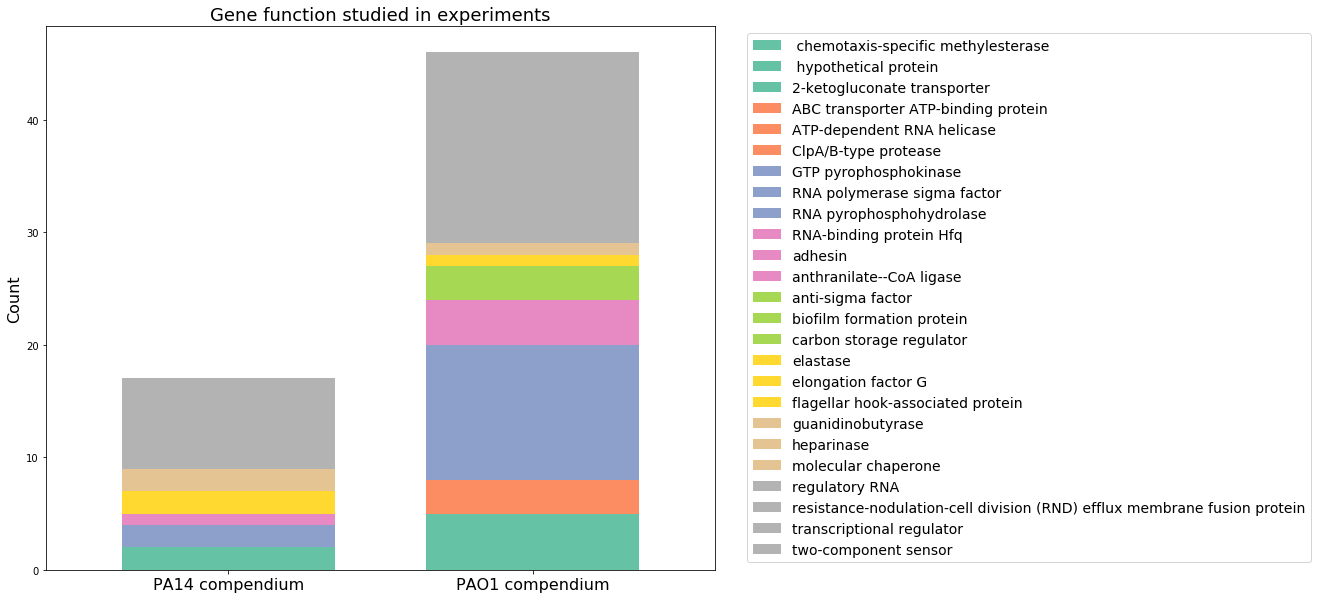

In [34]:
fig_function = both_metadata_first_function.plot(
    kind="bar", stacked=True, colormap="Set2", figsize=(12, 10), width=0.7
)
plt.legend(bbox_to_anchor=(1.9, 1), loc="upper right", ncol=1, fontsize=14)
plt.title("Gene function studied in experiments", fontsize=18)
fig_function.set_xlabel("")
fig_function.set_ylabel("Count", fontsize=16)
fig_function.set_xticklabels(
    ["PA14 compendium", "PAO1 compendium"], rotation=0, fontsize=16
)

## Plot pathways associated with perturbed gene

There are 3 possible reasons that the value = Nan:
1. The sample was a control sample
2. The perturbed gene was not found to be associated to a pathway due to limitations in annotation information
3. The experimental design was not performing a genetic malnipulation

In [35]:
# Format dataframe so that the only row with NaN corresponds to study where
# they did not perform a genetic malnipulation and so "Perturbed.Gene" = None

In [36]:
# Concatenate
both_metadata_all = pd.concat([pao1_metadata, pa14_metadata])

In [37]:
both_metadata_final2 = both_metadata_all.replace({"KEGG.Pathway": pathway_dict})

In [38]:
both_metadata_kegg = (
    both_metadata_final2.groupby(["Strain", "KEGG.Pathway"])
    .size()
    .reset_index()
    .pivot(columns="KEGG.Pathway", index="Strain", values=0)
)

In [39]:
both_metadata_kegg

KEGG.Pathway,ABC transporters,Amino acid metabolism,Amino and/or nucleotide sugar metabolism,Biofilm formation,Biosynthesis of secondary metabolites,CAMP resistance,Chemotaxis,Flagellar assembly,Fructose and mannose metabolism,Metabolic pathways,Phenazine biosynthesis,Quorum sensing,RNA degradation,Secretion system,Transcription factors,Two-component system,beta-Lactam resistance
Strain,,,,,,,,,,,,,,,,,
PA14,NaN,NaN,NaN,9.0,1.0,1.0,2.0,12.0,NaN,NaN,1.0,5.0,NaN,NaN,1.0,19.0,NaN
PAO1,4.0,5.0,3.0,20.0,1.0,4.0,NaN,7.0,1.0,6.0,NaN,9.0,6.0,1.0,NaN,21.0,8.0


In [40]:
# Output kegg metadata for Georgia to review
# both_metadata_kegg.T.to_csv("pathway_legend.tsv", sep="\t")

[Text(0, 0, 'PA14 compendium'), Text(0, 0, 'PAO1 compendium')]

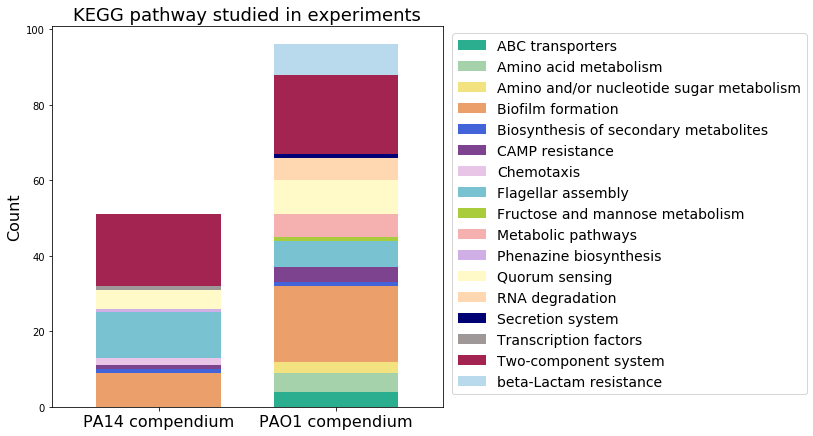

In [41]:
fig_kegg = both_metadata_kegg.plot(
    kind="bar", stacked=True, color=my_cmap, figsize=(7, 7), width=0.7
)
plt.legend(bbox_to_anchor=(1.95, 1), loc="upper right", ncol=1, fontsize=14)
plt.title("KEGG pathway studied in experiments", fontsize=18)
fig_kegg.set_xlabel("")
fig_kegg.set_ylabel("Count", fontsize=16)
fig_kegg.set_xticklabels(
    ["PA14 compendium", "PAO1 compendium"], rotation=0, fontsize=16
)

In [42]:
# Save plots
fig_media.figure.savefig(
    "compendia_media.svg", dpi=300, format="svg", bbox_inches="tight"
)
fig_function.figure.savefig(
    "compendia_gene_function.svg", dpi=300, format="svg", bbox_inches="tight"
)
fig_kegg.figure.savefig(
    "compendia_kegg.svg", dpi=300, format="svg", bbox_inches="tight"
)